In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import plotly as py
import plotly.graph_objects as go
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
from statsmodels.graphics.regressionplots import abline_plot
import numpy as np

**Importing csv file and first 5 rows**

In [31]:
df = pd.read_csv("csv-1.csv")
df.head()

,Indicator,Group,State,Subgroup,Week,Week Label,Value,Low CI,High CI,Confidence Interval,Quartile range
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,Apr 23 - May 5,23.5,22.7,24.3,22.7 - 24.3,NaN
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,Apr 23 - May 5,32.7,30.2,35.2,30.2 - 35.2,NaN
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,Apr 23 - May 5,25.7,24.1,27.3,24.1 - 27.3,NaN
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,Apr 23 - May 5,24.8,23.3,26.2,23.3 - 26.2,NaN
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,Apr 23 - May 5,23.2,21.5,25.0,21.5 - 25.0,NaN


**ANXIETY**

In [32]:
mask = df["Indicator"] == "Symptoms of Anxiety Disorder"
anx_df = df[mask]

anx_df.head()

,Indicator,Group,State,Subgroup,Week,Week Label,Value,Low CI,High CI,Confidence Interval,Quartile range
70,Symptoms of Anxiety Disorder,National Estimate,United States,United States,1,Apr 23 - May 5,30.8,30.0,31.7,30.0 - 31.7,NaN
71,Symptoms of Anxiety Disorder,By Age,United States,18 - 29 years,1,Apr 23 - May 5,40.2,38.1,42.4,38.1 - 42.4,NaN
72,Symptoms of Anxiety Disorder,By Age,United States,30 - 39 years,1,Apr 23 - May 5,34.4,32.6,36.1,32.6 - 36.1,NaN
73,Symptoms of Anxiety Disorder,By Age,United States,40 - 49 years,1,Apr 23 - May 5,34.1,32.1,36.2,32.1 - 36.2,NaN
74,Symptoms of Anxiety Disorder,By Age,United States,50 - 59 years,1,Apr 23 - May 5,31.0,29.0,33.1,29.0 - 33.1,NaN


**ANXIETY by Age**

In [33]:
mask = anx_df["Group"] == "By Age"
anx_age_df = anx_df[mask]

anx_age_df.head()

,Indicator,Group,State,Subgroup,Week,Week Label,Value,Low CI,High CI,Confidence Interval,Quartile range
71,Symptoms of Anxiety Disorder,By Age,United States,18 - 29 years,1,Apr 23 - May 5,40.2,38.1,42.4,38.1 - 42.4,NaN
72,Symptoms of Anxiety Disorder,By Age,United States,30 - 39 years,1,Apr 23 - May 5,34.4,32.6,36.1,32.6 - 36.1,NaN
73,Symptoms of Anxiety Disorder,By Age,United States,40 - 49 years,1,Apr 23 - May 5,34.1,32.1,36.2,32.1 - 36.2,NaN
74,Symptoms of Anxiety Disorder,By Age,United States,50 - 59 years,1,Apr 23 - May 5,31.0,29.0,33.1,29.0 - 33.1,NaN
75,Symptoms of Anxiety Disorder,By Age,United States,60 - 69 years,1,Apr 23 - May 5,24.9,23.6,26.3,23.6 - 26.3,NaN


**Age Grouping for Anxiety**

In [34]:
age = anx_age_df.groupby("Subgroup")[["Value"]].describe()
age

Value                                                     
                   count       mean       std   min    25%   50%    75%   max
Subgroup                                                                     
18 - 29 years        7.0  40.957143  1.660178  38.6  39.65  41.7  42.10  42.9
30 - 39 years        7.0  34.928571  1.484042  32.2  34.35  35.2  35.80  36.8
40 - 49 years        7.0  32.842857  1.720327  30.7  31.65  32.1  34.45  34.9
50 - 59 years        7.0  30.400000  1.368698  28.4  29.30  31.0  31.50  31.8
60 - 69 years        7.0  22.900000  1.042433  22.0  22.25  22.3  23.30  24.9
70 - 79 years        7.0  16.114286  1.692561  13.4  15.20  16.4  17.20  18.2
80 years and above   7.0  13.728571  2.009738  11.0  12.55  13.7  14.60  17.1

In [35]:
# separate into different education levels
mask20 = anx_age_df["Subgroup"] == "18 - 29 years"
age20 = anx_age_df[mask20]

mask30 = anx_age_df["Subgroup"] == "30 - 39 years"
age30 = anx_age_df[mask30]

mask40 = anx_age_df["Subgroup"] == "40 - 49 years"
age40 = anx_age_df[mask40]

mask50 = anx_age_df["Subgroup"] == "50 - 59 years"
age50 = anx_age_df[mask50]

mask60 = anx_age_df["Subgroup"] == "60 - 69 years"
age60 = anx_age_df[mask60]

mask70 = anx_age_df["Subgroup"] == "70 - 79 years"
age70 = anx_age_df[mask70]

mask80 = anx_age_df["Subgroup"] == "80 years and above"
age80 = anx_age_df[mask80]

In [36]:
# extract values
a2 = age20[["Value"]]
a3 = age30[["Value"]]
a4 = age40[["Value"]]
a5 = age50[["Value"]]
a6 = age60[["Value"]]
a7 = age70[["Value"]]
a8 = age80[["Value"]]

**Visualization of Age Difference**

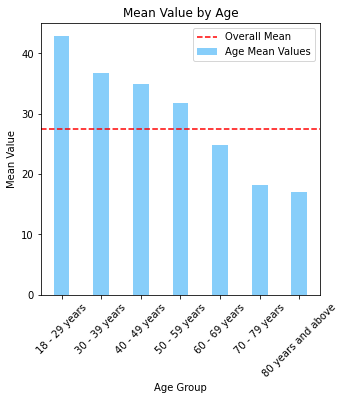

In [37]:
fig = plt.figure(figsize = (5, 5))

plt.bar(anx_age_df["Subgroup"], 
        anx_age_df["Value"], 
       width = 0.4,
       color = "lightskyblue",
       label = "Age Mean Values")

plt.xticks(rotation = 45)

plt.xlabel("Age Group")

plt.ylabel("Mean Value")

plt.title("Mean Value by Age")

plt.axhline(y = np.mean(anx_age_df["Value"]),
           color = "r",
           linestyle = "--",
           label = "Overall Mean")

plt.legend()

In [38]:
model = ols('Value ~ C(Subgroup)', 
            data = anx_age_df).fit()

sm.stats.anova_lm(model, type = 2)

,df,sum_sq,mean_sq,F,PR(>F)
C(Subgroup),6.0,4295.373469,715.895578,281.818462,2.862365e-32
Residual,42.0,106.691429,2.540272,NaN,NaN


In [39]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     281.8
Date:                Thu, 03 Aug 2023   Prob (F-statistic):           2.86e-32
Time:                        22:14:19   Log-Likelihood:                -88.592
No. Observations:                  49   AIC:                             191.2
Df Residuals:                      42   BIC:                             204.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            40.9571      0.602     67.989      0.000      39.741      42.173
C(Subgroup)[T.30 - 39 years]         -6.0286      0.852     -7.076      0.000      -7.748      -4.309
C(Subgroup)[T.40 - 49 years]         -8.1143      0.852     -9.525      0.000      -9.834      -6.395
C(Subgroup)[T.50 - 59 years]        -10.5571      0.852    -12.392      0.000     -12.276      -8.838
C(Subgroup)[T.60 - 69 years]        -18.0571      0.852    -21.195      0.000     -19.776     -16.338
C(Subgroup)[T.70 - 79 years]        -24.8429      0.852    -29.161      0.000     -26.562     -23.124
C(Subgroup)[T.80 years and above]   -27.2286      0.852    -31.961      0.000     -28.948     -25.509
==============================================================================
Omnibus:                        1.707   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.426   Jarque-Bera (JB):                1.175
Skew:                          -0.061   Prob(JB):                        0.556
Kurtosis:                       2.251   Cond. No.                         7.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
model.pvalues

Intercept                            1.358092e-44
C(Subgroup)[T.30 - 39 years]         1.130751e-08
C(Subgroup)[T.40 - 49 years]         4.706198e-12
C(Subgroup)[T.50 - 59 years]         1.284942e-15
C(Subgroup)[T.60 - 69 years]         4.754923e-24
C(Subgroup)[T.70 - 79 years]         1.678206e-29
C(Subgroup)[T.80 years and above]    4.196045e-31
dtype: float64

Text(0.5, 0, 'Age')

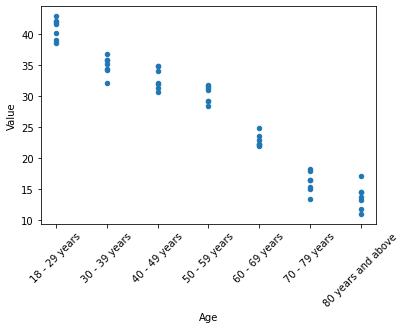

In [41]:
ax = anx_age_df.plot(x = 'Subgroup',
                      y = 'Value', 
                      kind='scatter')

plt.xticks(rotation = 45)

plt.xlabel("Age")

Text(0, 0.5, 'Age')

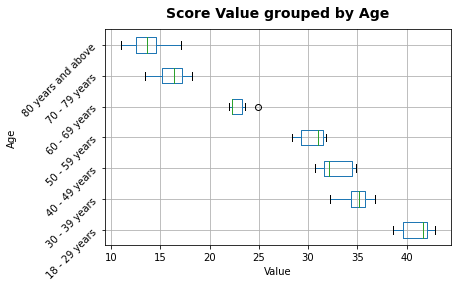

In [42]:
anx_age_df.boxplot(column = "Value",
                    by = "Subgroup",
                   vert = False)

plt.yticks(rotation = 45)

plt.suptitle('Score Value grouped by Age', fontsize=14, fontweight='bold')
plt.title("")
plt.xlabel("Value")
plt.ylabel("Age")